In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('mediacompany.csv')
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [31]:
## converting date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
## Deriving days since the show started
from datetime import date

d0 = pd.Timestamp('2017-02-28 00:00:00',tz=None)
print(type(d0))
print(type(df['Date'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [54]:
df['Day'] = df['Date'] - d0
df['Day'] = df['Day'].astype(str)
df['Day'] = df['Day'].map(lambda x:x[0:2])
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


In [55]:
df['Day'] = df['Day'].astype(int)

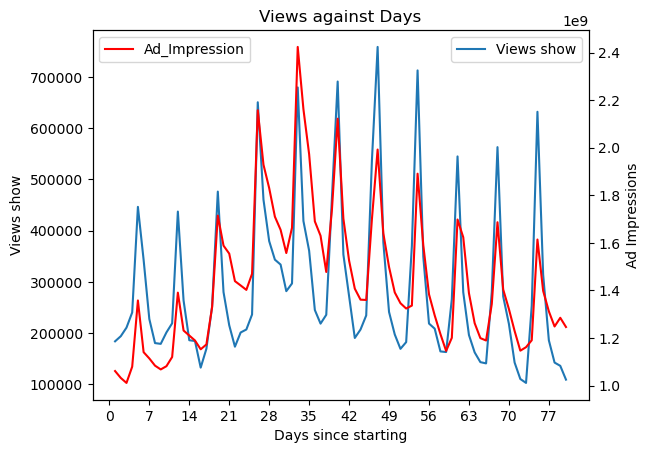

In [56]:
## plotting the data
plt.figure()
plt.plot(df.Day,df['Views_show'],label='Views show')
plt.xlabel('Days since starting')
plt.xticks(range(0,len(df.index),7))
plt.ylabel('Views show')
plt.title('Views against Days')
plt.legend(loc='upper right')

## creating a secondary y axis
plt.twinx()
plt.plot(df.Day,df['Ad_impression'],color='red',label='Ad_Impression')
plt.ylabel('Ad Impressions')
plt.legend(loc='upper left')
# plt.show()

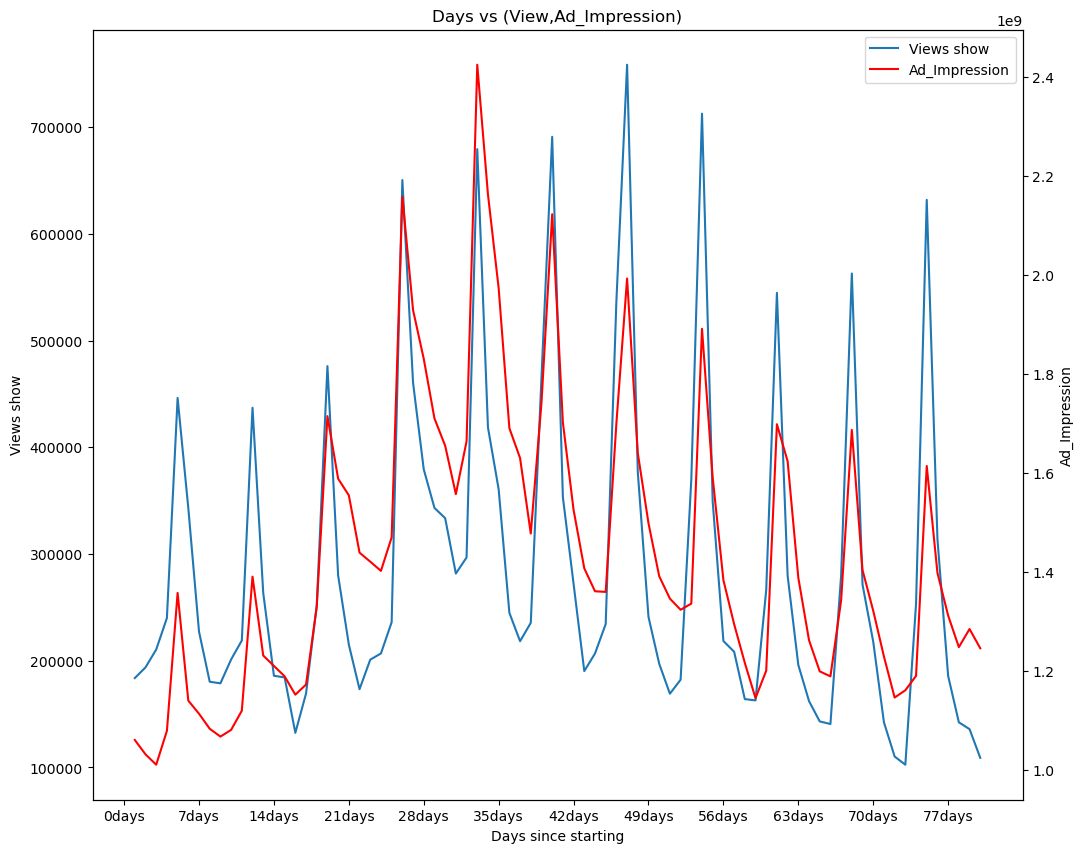

In [84]:
## Alternative
fig = plt.figure(figsize=(12,10))
ax1 = fig.subplots()

ax1.set_xlabel('Days since starting')
ax1.set_ylabel('Views show')
ax1.plot(df['Day'],df['Views_show'],label='Views show')
ax1.set_xticks(range(0,len(df['Day']),7))
ax1.set_xticklabels(['{}days'.format(day) for day in range(0,len(df['Day']),7)])

## creating a secondary y axis
ax2= ax1.twinx()
ax2.set_ylabel('Ad_Impression')
ax2.plot(df['Day'],df['Ad_impression'],color='red',label='Ad_Impression')


## concatenating legends from both the figures
line1,labels = ax1.get_legend_handles_labels()
line2,labels2 = ax2.get_legend_handles_labels()
ax2.legend(line1+line2,labels+labels2,loc='best')
plt.title('Days vs (View,Ad_Impression)')
## saving the plot
plt.savefig('')

In [94]:
## creating a new variable weekday

df['weekday'] = df['Date'].dt.dayofweek

In [96]:
## defining a new variable weekend
def map_days(value):
    if value in [5,6]:
        return 1
    else:
        return 0
    
df['weekend']= df['weekday'].apply(map_days)

## Running the first model

In [97]:
## Putting feature variable to X
X = df[['Visitors','weekday']]

y = df['Views_show']

In [98]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [99]:
X = sm.add_constant(X)
lr = sm.OLS(y,X).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.44
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           3.98e-08
Time:                        09:06:53   Log-Likelihood:                -1051.4
No. Observations:                  80   AIC:                             2109.
Df Residuals:                      77   BIC:                             2116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.927e+05   1.05e+05     -2.778      0.007   -5.02e+05   -8.29e+04
Visitors       0.3044      0.064      4.758      0.000       0.177       0.432
weekday      2.18e+04   7466.315      2.920      0.005    6931.179    3.67e+04
==============================================================================
Omnibus:                        3.323   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                3.101
Skew:                           0.411   Prob(JB):                        0.212
Kurtosis:                       2.495   Cond. No.                     1.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Running the second model with visitors and weekend

In [100]:
X = df[['Visitors','weekend']]
X = sm.add_constant(X)
lr2 = sm.OLS(y,X).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           2.51e-12
Time:                        09:08:43   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Here clearly the R2 values has been increased from 35% to 50%.

### Running the third Model with Visitors, weekend and Character A

In [102]:
X = df[['Visitors','weekend','Character_A']]
X = sm.add_constant(X)
lr3 = sm.OLS(y,X).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.53e-14
Time:                        09:10:05   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
## Creating a lag variable
df['Lag_Views'] = np.roll(df['Views_show'],1)
df.Lag_Views.replace(108961,0,inplace=True)

In [112]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1,240061


In [113]:
## Introducing this Lag variable in the model
X['Lag_Views'] = df['Lag_Views']
lr4 = sm.OLS(y,X).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           3.16e-21
Time:                        09:15:24   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      0.689   -1.78e+05    1.18e+05
Visitors        0.0659      0.047      1.394      0.167      -0.028       0.160
weekend      2.273e+05    2.4e+04      9.467      0.000    1.79e+05    2.75e+05
Character_A  5.527e+04   2.01e+04      2.748      0.008    1.52e+04    9.53e+04
Lag_Views       0.4317      0.065      6.679      0.000       0.303       0.560
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.821
Skew:                          -0.130   Prob(JB):                        0.663
Kurtosis:                       3.423   Cond. No.                     1.44e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Here there is a massive jump from 50% to 74% by simply adding this lag variable.

C:\Users\Prince\AppData\Local\Temp\ipykernel_5336\4216835528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

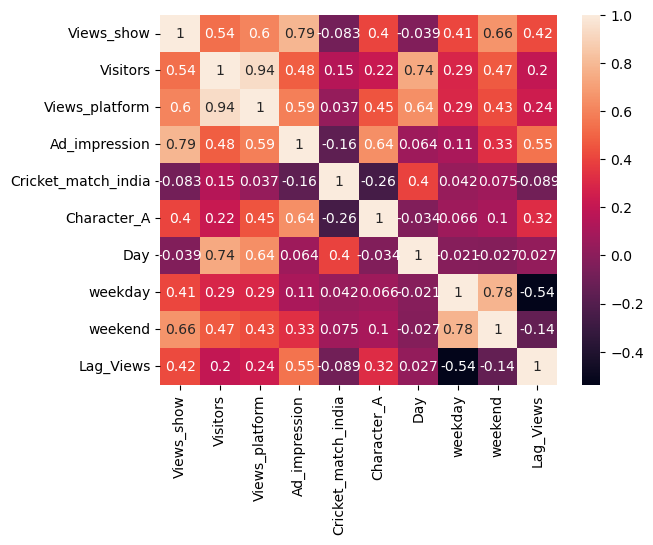

In [114]:
## correlation matrix
sns.heatmap(df.corr(),annot=True)

### Running the fifth model with weekend,Character_A,Views_platform

In [115]:
X = df[['weekend','Character_A','Views_platform']]
X = sm.add_constant(X)
lr5 = sm.OLS(y,X).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           3.59e-15
Time:                        09:18:50   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.208      0.231   -3.19e+05    7.81e+04
weekend         1.781e+05   2.78e+04      6.410      0.000    1.23e+05    2.33e+05
Character_A     7.062e+04    2.6e+04      2.717      0.008    1.89e+04    1.22e+05
Views_platform     0.1507      0.048      3.152      0.002       0.055       0.246
==============================================================================
Omnibus:                        4.279   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                2.153
Skew:                           0.061   Prob(JB):                        0.341
Kurtosis:                       2.206   Cond. No.                     2.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Running sixth modle with weekend, Char A and visitors

In [117]:
X = df[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
lr6 = sm.OLS(y,X).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.53e-14
Time:                        09:19:43   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Running the seventh model with weekend, Char A, Visitors, Ad_Impression

In [118]:
X = df[['weekend','Character_A','Visitors','Ad_impression']]
X = sm.add_constant(X)
lr7 = sm.OLS(y,X).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.10e-25
Time:                        09:20:35   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
weekend        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Running the 8th model with weekend, Char A, Ad_Impression

In [119]:
X = df[['weekend','Character_A','Ad_impression']]
X = sm.add_constant(X)
lr8 = sm.OLS(y,X).fit()
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.05e-26
Time:                        09:21:25   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Running the 9th model with weekend, Char A, ad_imperssion_million, Cricket match India

In [120]:
df['ad_impression_million'] = df['Ad_impression']/1000000

In [121]:
X = df[['weekend','Character_A','ad_impression_million','Cricket_match_india']]

In [122]:
X = sm.add_constant(X)
lr9 = sm.OLS(y,X).fit()
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.02e-25
Time:                        09:24:10   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+05    4.8e+04     -5.484      0.000   -3.59e+05   -1.68e+05
weekend                1.521e+05    1.9e+04      7.987      0.000    1.14e+05     1.9e+05
Character_A           -3.196e+04   2.19e+04     -1.457      0.149   -7.57e+04    1.17e+04
ad_impression_million   363.7938     37.113      9.802      0.000     289.861     437.727
Cricket_match_india   -1.396e+04   2.74e+04     -0.510      0.612   -6.85e+04    4.06e+04
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     9.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Running 10 th model with weekend, Char A, ad impression million

In [124]:
X = df[['weekend','Character_A','ad_impression_million']]
X = sm.add_constant(X)
lr10 = sm.OLS(y,X).fit()
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.05e-26
Time:                        09:25:00   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
weekend                 1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
Character_A            -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
ad_impression_million   364.4670     36.909      9.875      0.000     290.957     437.977
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Making predictions using lr10

In [128]:
y_pred = lr10.predict(X)
from sklearn.metrics import mean_squared_error,r2_score
MSE = mean_squared_error(y,y_pred)
r2 = r2_score(y,y_pred)
print(MSE)
print(r2)

4677651616.2534075
0.802643446857565


### Plotting actual vs the Predicted Values

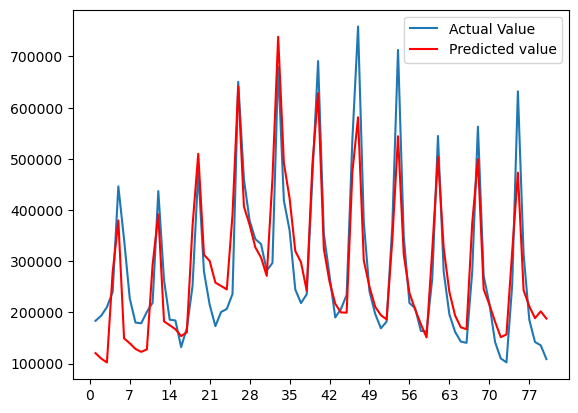

In [131]:
plt.figure()
plt.plot(df['Day'],df['Views_show'],label='Actual Value')
plt.plot(df['Day'],y_pred,label='Predicted value',color='red')
plt.legend(loc='best')
plt.xticks(range(0,len(df['Day']),7))
plt.show()

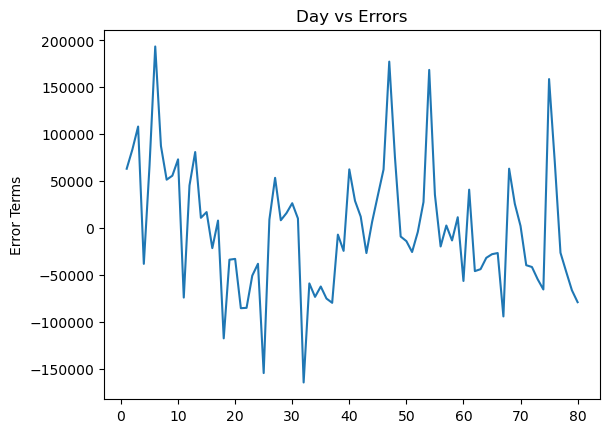

In [134]:
### plotting the error terms
res = y - y_pred
plt.plot(df['Day'],res)
plt.ylabel('Error Terms')
plt.title('Day vs Errors')
plt.show()

### Making predictions Using lr6

In [135]:
X = df[['weekend','Character_A','Visitors']]
X = sm.add_constant(X)
lr6 = sm.OLS(y,X).fit()
y_pred_6 = lr6.predict(X)
res = y-y_pred_6

In [136]:
print('Mean Squared Error:',mean_squared_error(y,y_pred_6))
print('R squared value:',r2_score(y,y_pred_6))

Mean Squared Error: 9815432480.451523
R squared value: 0.585873408097934


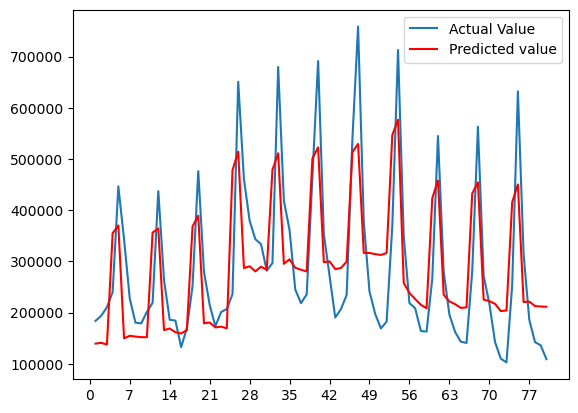

In [138]:
## pltotting Actual vs Predicted
plt.plot(df['Day'],df['Views_show'],label='Actual Value')
plt.plot(df['Day'],y_pred_6,label='Predicted value',color='red')
plt.legend(loc='best')
plt.xticks(range(0,len(df['Day']),7))
plt.show()

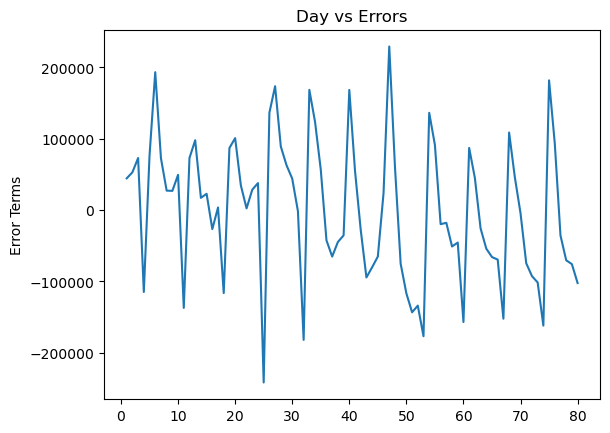

In [137]:
## Plotting out the figure
plt.plot(df['Day'],res)
plt.ylabel('Error Terms')
plt.title('Day vs Errors')
plt.show()